In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.reset_defaults()
sns.set_theme(style='whitegrid')

In [65]:
def bench(source='std', n=2**20, q=2**20, cc='clang++', latency=False, make=False):
    if make:
        !make {source}
        res = !./{source} {n} {q}
    else:
        !{cc} -std=c++17 -O3 -march=native -D N={n} {'-D LATENCY' if latency else ''} {source}.cc -o run
        res = !./run {n} {q}
    duration = float(res[0].split()[0])
    check = int(res[1])
    print(f'{source:>18} {cc:<7} {n:<7} {q:<7} {check:10} {duration}')
    return duration

In [14]:
def plot(title=None, ylabel=None, path=None, ch=None, legend=True, ylim=None):
    if ch:
        lines = [
            (2**13, "32K"),
            (2**17, "512K"),
            (2**20, "4M"),
        ]

        for x, t in lines:
            plt.text(x * 1.2, ch, t)
            plt.axvline(x=x, color='black', linestyle='--')

    plt.xscale('log', basex=2)
    plt.xlabel('Array size')

    if ylabel:
        plt.ylabel(ylabel)

    if title:
        plt.title(title, pad=12)

    if legend:
        plt.legend(loc='best')

    plt.ylim(bottom=0, top=ylim)
    plt.margins(0)

    if path:
        fig = plt.gcf()
        fig.savefig(path)
    
    plt.show()

In [14]:
bench('std', q=2**22, cc='g++')
bench('std', q=2**22, cc='clang++')
bench('textbook', q=2**22, cc='g++')
bench('textbook', q=2**22, cc='clang++')

               std g++     1048576 4194304  334323926 363.3
               std clang++ 1048576 4194304  334323926 386.69
          textbook g++     1048576 4194304  334323926 395.87
          textbook clang++ 1048576 4194304  334323926 395.29


395.29

In [15]:
bench('branchless', cc='g++')

        branchless g++     1048576 1048576 1043364677 313.31


313.31

In [16]:
bench('std', n=2**23, q=2**22, cc='clang++')
bench('textbook', n=2**23, q=2**22, cc='clang++')

               std clang++ 8388608 4194304  778587145 865.5
          textbook clang++ 8388608 4194304  778587145 875.21


875.21

In [27]:
bench('textbook', n=2**22, q=2**22, cc='g++')
bench('branchless', n=2**22, q=2**22, cc='g++')
bench('branchless-prefetch', n=2**22, q=2**22, cc='g++')

          textbook g++     4194304 4194304  305940602 748.85
        branchless g++     4194304 4194304  305940602 650.68
branchless-prefetch g++     4194304 4194304  305940602 604.08


604.08

In [34]:
#bench('eytzinger', n=2**22, q=2**22, cc='clang++')
bench('eytzinger-prefetch', n=2**22, q=2**23, cc='g++')
bench('eytzinger-prefetch2', n=2**22, q=2**23, cc='g++')

eytzinger-prefetch g++     4194304 8388608 1404471057 201.94
eytzinger-prefetch2 g++     4194304 8388608 1404471057 192.61


192.61

In [47]:
for source in ['eytzinger', 'eytzinger-fill', 'eytzinger-last']:
    bench(source, n=int(2**12), q=2**20, cc='clang++')

         eytzinger clang++ 4096    1048576 1600616319 28.59
    eytzinger-fill clang++ 4096    1048576 1600616319 31.95
    eytzinger-last clang++ 4096    1048576 1600616319 31.04


In [49]:
for source in ['btree', 'btree-hugepages', 'btree-optimized']:
    bench(source, n=2**23, q=2**20, cc='clang++')

             btree clang++ 8388608 1048576   70931121 153.2
   btree-hugepages clang++ 8388608 1048576   70931121 135.82


In [54]:
for source in ['btree-optimized', 'bplus', 'bplus32', 'bplus-nontemporal']:
    bench(source, n=2**23, q=2**20, cc='clang++')

   btree-optimized clang++ 8388608 1048576   70931121 116.46
             bplus clang++ 8388608 1048576   70931121 79.58
           bplus32 clang++ 8388608 1048576   70931121 86.16
 bplus-nontemporal clang++ 8388608 1048576   70931121 79.61


In [55]:
for source in ['bplus', 'bplus32', 'bplus-nontemporal']:
    bench(source, n=2**25, q=2**23, cc='clang++')

             bplus clang++ 33554432 8388608 1774518850 114.76
           bplus32 clang++ 33554432 8388608 1774518850 103.61
 bplus-nontemporal clang++ 33554432 8388608 1774518850 112.78


In [18]:
bench('bplus', n=2**22, q=2**22, cc='g++')

             bplus g++     4194304 4194304  305940602 86.15


86.15

In [17]:
bench('bplus', n=2**22, q=2**22, cc='clang++')

             bplus clang++ 4194304 4194304  305940602 82.31


82.31

In [5]:
bench('std', cc='g++')

               std 1048576 1048576 1043364677 382.45


382.45

In [5]:
ns = list(int(1.17**k) for k in range(30, 110))

sources1 = [
    'std',
    'branchless',
    'branchless-prefetch',
    'eytzinger',
    'eytzinger-prefetch',
    'eytzinger-prefetch2',
    'eytzinger-last',
    'btree',
    'btree-hugepages',
]

sources2 = [
    'btree-optimized',
    'bplus',
    'bplus32',
    'bplus-nontemporal'
]

results = {}

make: 'std' is up to date.
               std clang++ 111     4194304 1067433874 47.97
make: 'std' is up to date.
               std clang++ 129     4194304 2084202863 49.68
make: 'std' is up to date.
               std clang++ 152     4194304 1650086489 50.57
make: 'std' is up to date.
               std clang++ 177     4194304 1093987052 53.4
make: 'std' is up to date.
               std clang++ 208     4194304  849577987 53.92
make: 'std' is up to date.
               std clang++ 243     4194304 1842022031 56.36
make: 'std' is up to date.
               std clang++ 284     4194304   24170984 58.32
make: 'std' is up to date.
               std clang++ 333     4194304 1064724685 59.86
make: 'std' is up to date.
               std clang++ 389     4194304 1049421536 63.24
make: 'std' is up to date.
               std clang++ 456     4194304 1677787291 65.56
make: 'std' is up to date.
               std clang++ 533     4194304 1381557454 68.43
make: 'std' is up to date.
               st

"\ntasks = [\n    # source, name, color\n    ('std', 'std::lower_bound', 'darkred'),\n    ('branchless', 'branchless', 'darkblue'),\n    ('eytzinger', 'eytzinger', 'darkgreen'),\n    ('eytzinger-prefetch', 'eytzinger (with prefetching)', 'orange'),\n    ('btree', 'B-tree (with SIMD)', 'purple'),\n    ('btree-hugepages', 'B-tree (with SIMD and huge pages)', 'cyan'),\n]\n\nresults = [\n    [bench(n=n, q=2**22, source=source) for n in ns]\n    for source, _, _ in tasks\n]\n"

In [69]:
for source in sources1:
    results[source] = [bench(source, n=n, q=2**22, make=True) for n in ns]

clang++ -std=c++17 -O3 -march=native std.cc -o std 
               std clang++ 111     4194304 1067433874 47.8
make: 'std' is up to date.
               std clang++ 129     4194304 2084202863 49.3
make: 'std' is up to date.
               std clang++ 152     4194304 1650086489 50.53
make: 'std' is up to date.
               std clang++ 177     4194304 1093987052 52.68
make: 'std' is up to date.
               std clang++ 208     4194304  849577987 54.43
make: 'std' is up to date.
               std clang++ 243     4194304 1842022031 56.67
make: 'std' is up to date.
               std clang++ 284     4194304   24170984 57.71
make: 'std' is up to date.
               std clang++ 333     4194304 1064724685 60.49
make: 'std' is up to date.
               std clang++ 389     4194304 1049421536 63.27
make: 'std' is up to date.
               std clang++ 456     4194304 1677787291 65.76
make: 'std' is up to date.
               std clang++ 533     4194304 1381557454 68.5
make: 'std' is up to 

In [8]:
for source in sources2:
    results[source] = [bench(source, n=n, q=2**22) for n in ns]

   btree-optimized clang++ 111     4194304 1067433874 6.54
   btree-optimized clang++ 129     4194304 2084202863 6.49
   btree-optimized clang++ 152     4194304 1650086489 6.31
   btree-optimized clang++ 177     4194304 1093987052 8.39
   btree-optimized clang++ 208     4194304  849577987 7.12
   btree-optimized clang++ 243     4194304 1842022031 6.62
   btree-optimized clang++ 284     4194304   24170984 8.73
   btree-optimized clang++ 333     4194304 1064724685 14.31
   btree-optimized clang++ 389     4194304 1049421536 16.11
   btree-optimized clang++ 456     4194304 1677787291 18.14
   btree-optimized clang++ 533     4194304 1381557454 19.02
   btree-optimized clang++ 624     4194304  485950239 14.17
   btree-optimized clang++ 730     4194304 1743435292 15.88
   btree-optimized clang++ 855     4194304 1980389118 13.05
   btree-optimized clang++ 1000    4194304  929098415 14.38
   btree-optimized clang++ 1170    4194304 1814983758 14.06
   btree-optimized clang++ 1369    4194304  683

In [71]:
import pickle

with open('results.pkl', 'wb') as file:
    pickle.dump(results, file)

In [10]:
latency_std = [bench('std', n=n, q=2**22, latency=True) for n in ns]
latency_bplus = [bench('bplus', n=n, q=2**22, latency=True) for n in ns]

               std clang++ 111     4194304  111861669 46.59
               std clang++ 129     4194304 1440545836 49.48
               std clang++ 152     4194304 2077162983 51.01
               std clang++ 177     4194304 1896606775 53.27
               std clang++ 208     4194304 1775521195 55.12
               std clang++ 243     4194304  683705420 58.99
               std clang++ 284     4194304 2093739871 61.08
               std clang++ 333     4194304  739204204 62.85
               std clang++ 389     4194304 1760469052 65.04
               std clang++ 456     4194304 1534932958 68.74
               std clang++ 533     4194304  962265959 71.1
               std clang++ 624     4194304  820864958 72.95
               std clang++ 730     4194304 1088766230 74.86
               std clang++ 855     4194304  551605089 77.56
               std clang++ 1000    4194304 1311095348 80.22
               std clang++ 1170    4194304 1816139493 82.21
               std clang++ 1369    419430

In [17]:
latency_bplus32 = [bench('bplus32', n=n, q=2**22, latency=True) for n in ns]
latency_bplus_nt = [bench('bplus-nontemporal', n=n, q=2**22, latency=True) for n in ns]

           bplus32 clang++ 111     4194304  111861669 24.43
           bplus32 clang++ 129     4194304 1440545836 24.38
           bplus32 clang++ 152     4194304 2077162983 24.66
           bplus32 clang++ 177     4194304 1896606775 24.36
           bplus32 clang++ 208     4194304 1775521195 24.4
           bplus32 clang++ 243     4194304  683705420 24.41
           bplus32 clang++ 284     4194304 2093739871 24.37
           bplus32 clang++ 333     4194304  739204204 24.36
           bplus32 clang++ 389     4194304 1760469052 24.39
           bplus32 clang++ 456     4194304 1534932958 24.61
           bplus32 clang++ 533     4194304  962265959 24.4
           bplus32 clang++ 624     4194304  820864958 24.38
           bplus32 clang++ 730     4194304 1088766230 24.42
           bplus32 clang++ 855     4194304  551605089 24.47
           bplus32 clang++ 1000    4194304 1311095348 24.41
           bplus32 clang++ 1170    4194304 1816139493 35.47
           bplus32 clang++ 1369    4194304

In [18]:
with open('latency.pkl', 'wb') as file:
    pickle.dump([latency_std, latency_bplus, latency_bplus32, latency_bplus_nt], file)

No handles with labels found to put in legend.


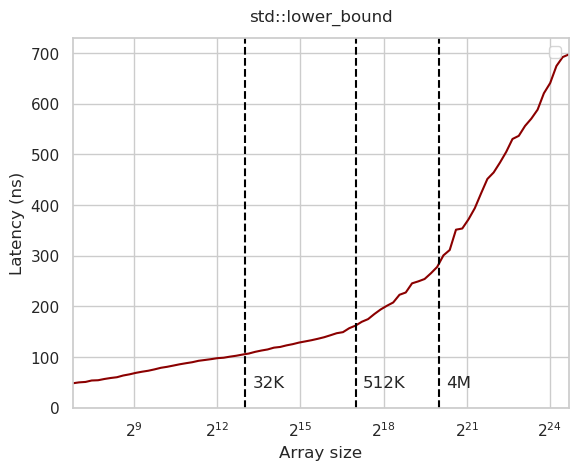

In [25]:
plt.plot(ns, results['std'], color='darkred')
plot('std::lower_bound', 'Latency (ns)', 'search-std.svg', 40, legend=False)

In [70]:
# change the compiler in the Makefile
for source in ['branchless', 'branchless-prefetch']:
    results[source] = [bench(source, n=n, q=2**22, make=True, cc='g++') for n in ns]

g++ -std=c++17 -O3 -march=native branchless.cc -o branchless 
        branchless g++     111     4194304 1067433874 13.27
make: 'branchless' is up to date.
        branchless g++     129     4194304 2084202863 16.91
make: 'branchless' is up to date.
        branchless g++     152     4194304 1650086489 16.91
make: 'branchless' is up to date.
        branchless g++     177     4194304 1093987052 16.55
make: 'branchless' is up to date.
        branchless g++     208     4194304  849577987 16.67
make: 'branchless' is up to date.
        branchless g++     243     4194304 1842022031 16.65
make: 'branchless' is up to date.
        branchless g++     284     4194304   24170984 18.81
make: 'branchless' is up to date.
        branchless g++     333     4194304 1064724685 18.81
make: 'branchless' is up to date.
        branchless g++     389     4194304 1049421536 18.91
make: 'branchless' is up to date.
        branchless g++     456     4194304 1677787291 18.81
make: 'branchless' is up to date

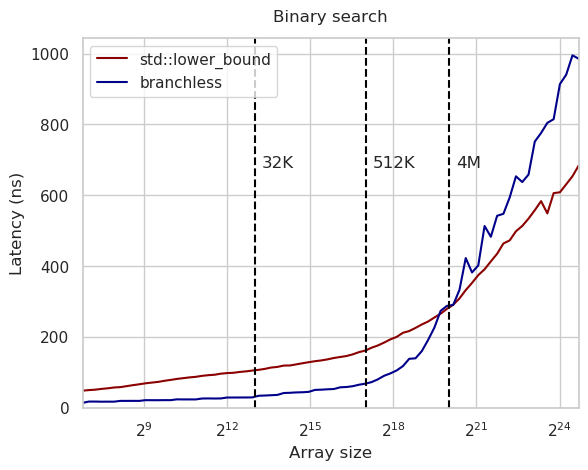

In [72]:
plt.plot(ns, results['std'], color='darkred', label='std::lower_bound')
plt.plot(ns, results['branchless'], color='darkblue', label='branchless')
plot('Binary search', 'Latency (ns)', 'search-branchless.svg', 680)

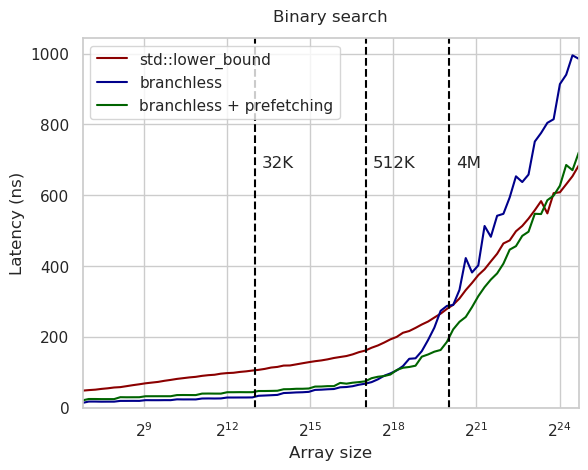

In [73]:
plt.plot(ns, results['std'], color='darkred', label='std::lower_bound')
plt.plot(ns, results['branchless'], color='darkblue', label='branchless')
plt.plot(ns, results['branchless-prefetch'], color='darkgreen', label='branchless + prefetching')
plot('Binary search', 'Latency (ns)', 'search-branchless-prefetch.svg', 680)

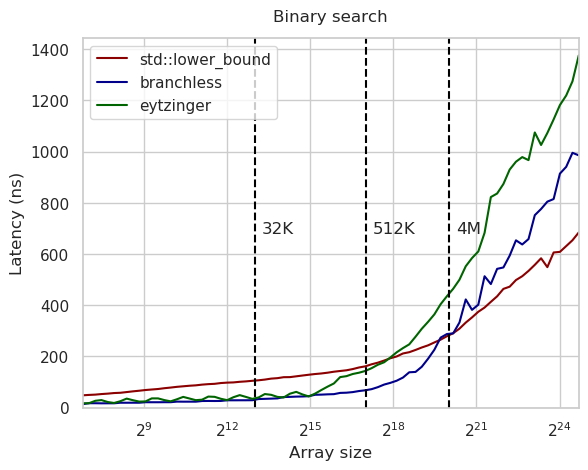

In [74]:
plt.plot(ns, results['std'], color='darkred', label='std::lower_bound')
plt.plot(ns, results['branchless'], color='darkblue', label='branchless')
plt.plot(ns, results['eytzinger'], color='darkgreen', label='eytzinger')
plot('Binary search', 'Latency (ns)', 'search-eytzinger.svg', 680)

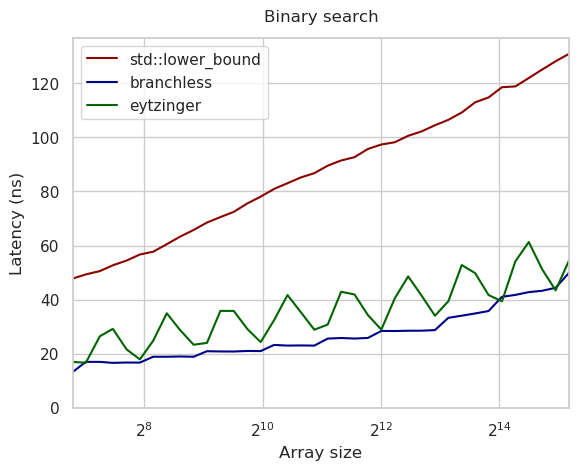

In [135]:
lim = 38
plt.plot(ns[:lim], results['std'][:lim], color='darkred', label='std::lower_bound')
plt.plot(ns[:lim], results['branchless'][:lim], color='darkblue', label='branchless')
plt.plot(ns[:lim], results['eytzinger'][:lim], color='darkgreen', label='eytzinger')
plot('Binary search', 'Latency (ns)', 'search-eytzinger-small.svg')

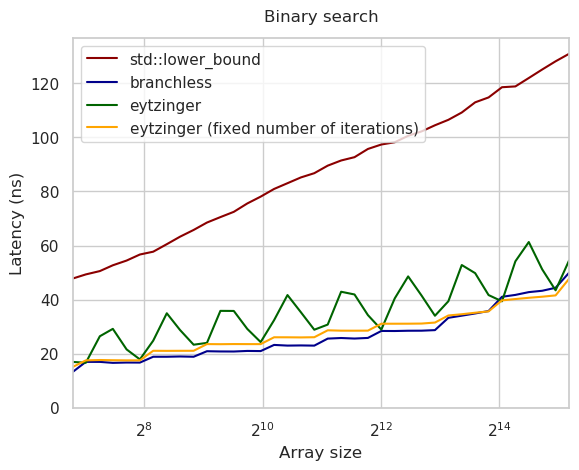

In [93]:
lim = 38
plt.plot(ns[:lim], results['std'][:lim], color='darkred', label='std::lower_bound')
plt.plot(ns[:lim], results['branchless'][:lim], color='darkblue', label='branchless')
plt.plot(ns[:lim], results['eytzinger'][:lim], color='darkgreen', label='eytzinger')
plt.plot(ns[:lim], results['eytzinger-last'][:lim], color='orange', label='eytzinger (fixed number of iterations)')
plot('Binary search', 'Latency (ns)', 'search-eytzinger-branchless.svg')

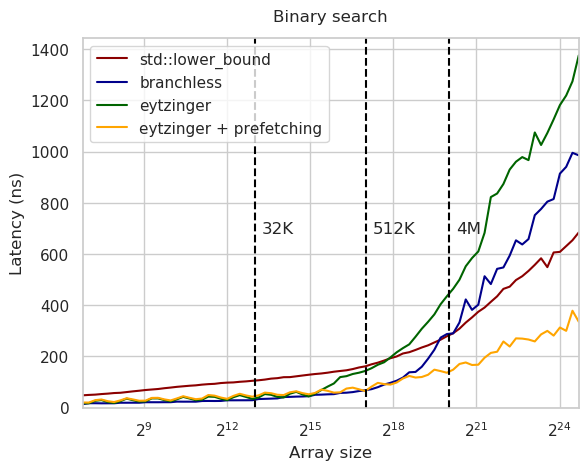

In [76]:
plt.plot(ns, results['std'], color='darkred', label='std::lower_bound')
plt.plot(ns, results['branchless'], color='darkblue', label='branchless')
plt.plot(ns, results['eytzinger'], color='darkgreen', label='eytzinger')
plt.plot(ns, results['eytzinger-prefetch'], color='orange', label='eytzinger + prefetching')
plot('Binary search', 'Latency (ns)', 'search-eytzinger-prefetch.svg', 680)

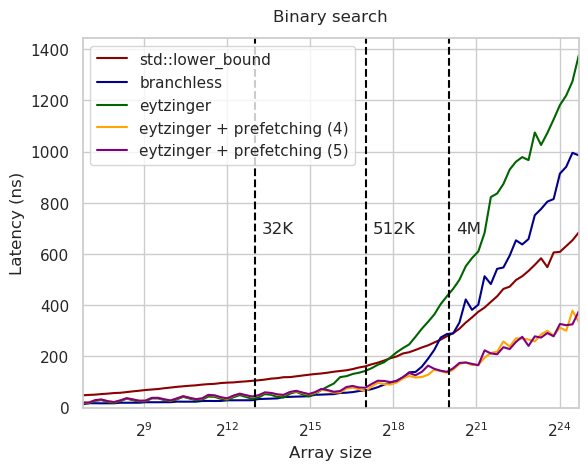

In [77]:
plt.plot(ns, results['std'], color='darkred', label='std::lower_bound')
plt.plot(ns, results['branchless'], color='darkblue', label='branchless')
plt.plot(ns, results['eytzinger'], color='darkgreen', label='eytzinger')
plt.plot(ns, results['eytzinger-prefetch'], color='orange', label='eytzinger + prefetching (4)')
plt.plot(ns, results['eytzinger-prefetch2'], color='purple', label='eytzinger + prefetching (5)')
plot('Binary search', 'Latency (ns)', 'search-eytzinger-prefetch2.svg', 680)

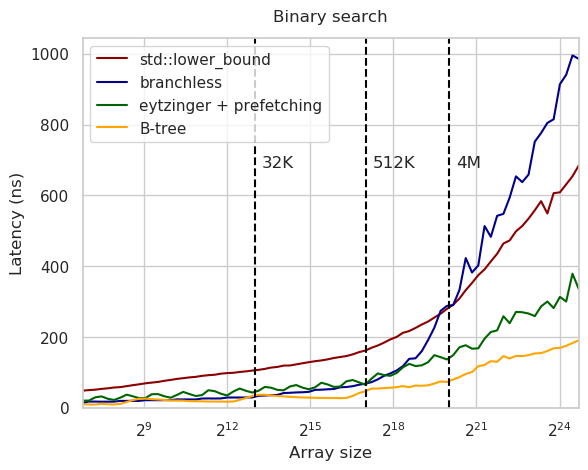

In [94]:
plt.plot(ns, results['std'], color='darkred', label='std::lower_bound')
plt.plot(ns, results['branchless'], color='darkblue', label='branchless')
plt.plot(ns, results['eytzinger-prefetch'], color='darkgreen', label='eytzinger + prefetching')
plt.plot(ns, results['btree'], color='orange', label='B-tree')
plot('Binary search', 'Latency (ns)', 'search-btree.svg', 680)

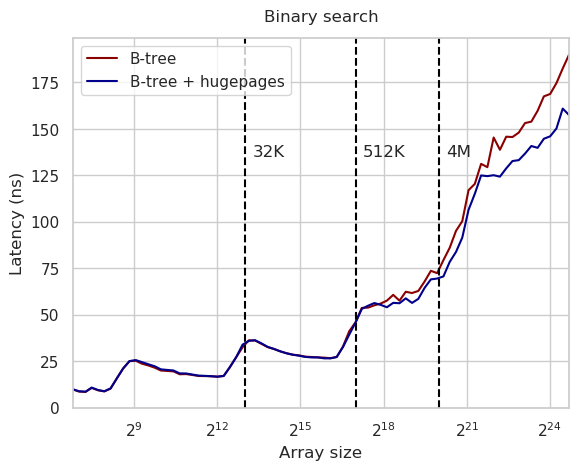

In [100]:
plt.plot(ns, results['btree'], color='darkred', label='B-tree')
plt.plot(ns, results['btree-hugepages'], color='darkblue', label='B-tree + hugepages')
plot('Binary search', 'Latency (ns)', 'search-btree-hugepages.svg', 135)

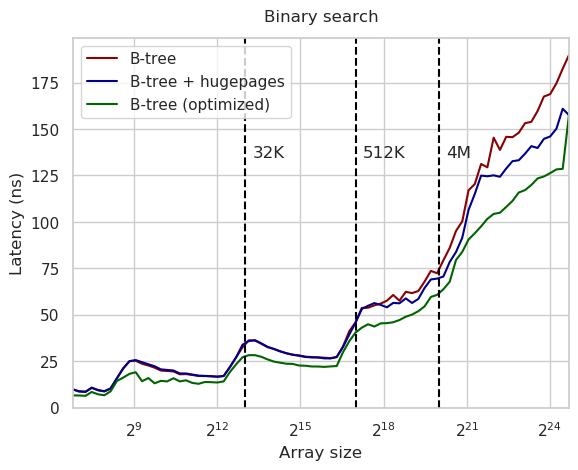

In [101]:
plt.plot(ns, results['btree'], color='darkred', label='B-tree')
plt.plot(ns, results['btree-hugepages'], color='darkblue', label='B-tree + hugepages')
plt.plot(ns, results['btree-optimized'], color='darkgreen', label='B-tree (optimized)')
plot('Binary search', 'Latency (ns)', 'search-btree-optimized.svg', 135)

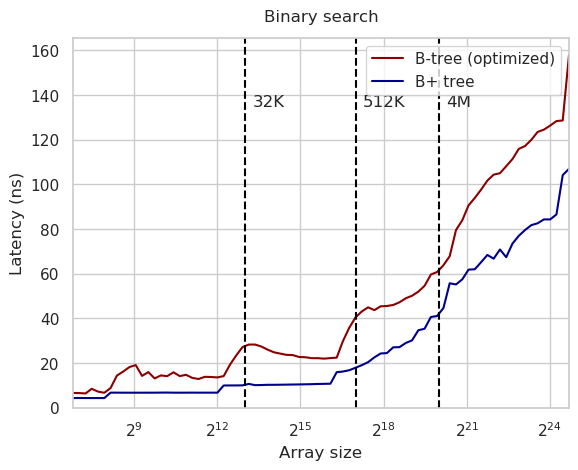

In [103]:
plt.plot(ns, results['btree-optimized'], color='darkred', label='B-tree (optimized)')
plt.plot(ns, results['bplus'], color='darkblue', label='B+ tree')
plot('Binary search', 'Latency (ns)', 'search-bplus.svg', 135)

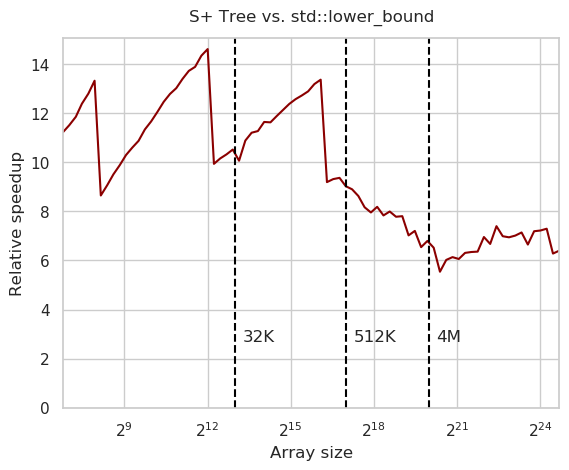

In [112]:
plt.plot(ns, [y / x for x, y in zip(results['bplus'], results['std'])], color='darkred')
plot('S+ Tree vs. std::lower_bound', 'Relative speedup', 'search-relative.svg', 2.7, legend=False)

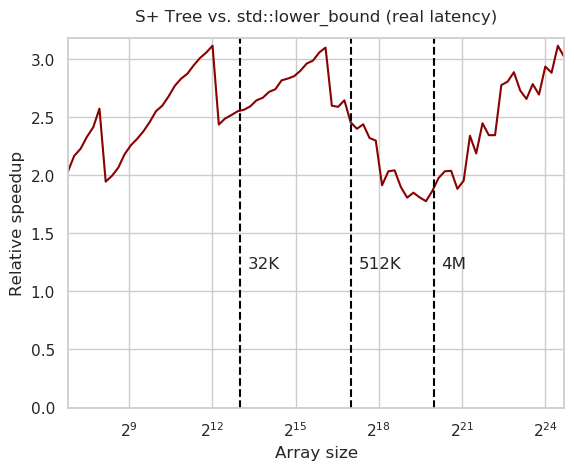

In [114]:
plt.plot(ns, [y / x for x, y in zip(latency_bplus, latency_std)], color='darkred')
plot('S+ Tree vs. std::lower_bound (real latency)', 'Relative speedup', 'search-relative-latency.svg', 1.2, legend=False)

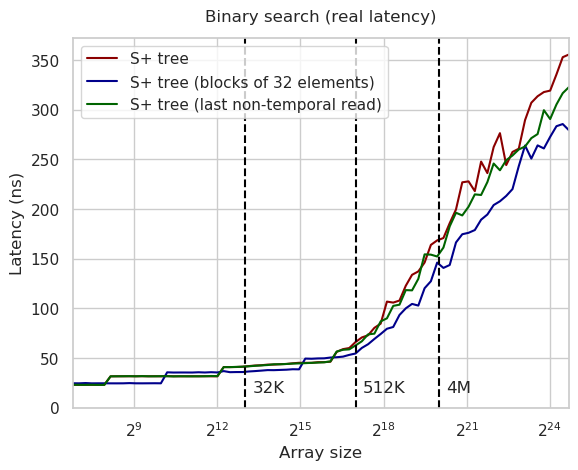

In [125]:
plt.plot(ns, latency_bplus, color='darkred', label='S+ tree')
plt.plot(ns, latency_bplus32, color='darkblue', label='S+ tree (blocks of 32 elements)')
plt.plot(ns, latency_bplus_nt, color='darkgreen', label='S+ tree (last non-temporal read)')
plot('Binary search (real latency)', 'Latency (ns)', 'search-latency-bplus.svg', 15)

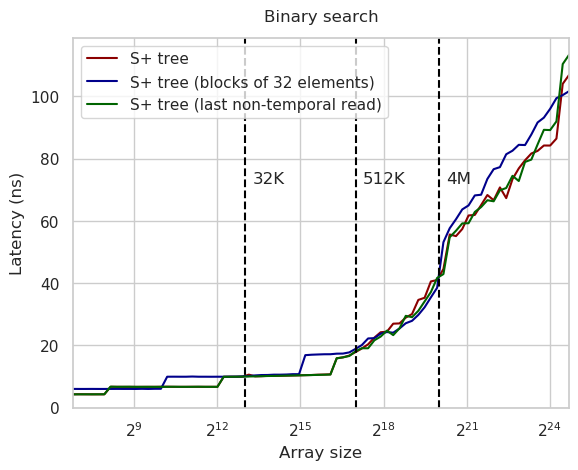

In [126]:
plt.plot(ns, results['bplus'], color='darkred', label='S+ tree')
plt.plot(ns, results['bplus32'], color='darkblue', label='S+ tree (blocks of 32 elements)')
plt.plot(ns, results['bplus-nontemporal'], color='darkgreen', label='S+ tree (last non-temporal read)')
plot('Binary search', 'Latency (ns)', 'search-bplus-other.svg', 72)

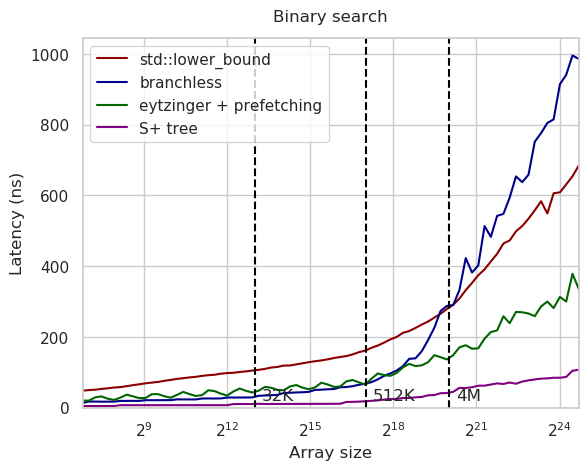

In [137]:
plt.plot(ns, results['std'], color='darkred', label='std::lower_bound')
plt.plot(ns, results['branchless'], color='darkblue', label='branchless')
plt.plot(ns, results['eytzinger-prefetch'], color='darkgreen', label='eytzinger + prefetching')
plt.plot(ns, results['bplus'], color='purple', label='S+ tree')
plot('Binary search', 'Latency (ns)', 'search-all.svg', 20)

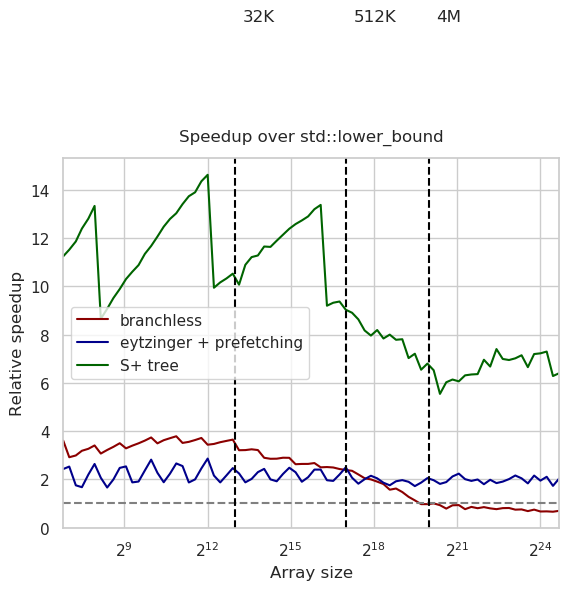

In [142]:
def rel(source):
    return [y / x for x, y in zip(results[source], results['std'])]

plt.plot(ns, rel('branchless'), color='darkred', label='branchless')
plt.plot(ns, rel('eytzinger-prefetch'), color='darkblue', label='eytzinger + prefetching')
plt.plot(ns, rel('bplus'), color='darkgreen', label='S+ tree')

plt.axhline(y=1, color='grey', linestyle='--')

plot('Speedup over std::lower_bound', 'Relative speedup', 'search-all-relative.svg', 21)

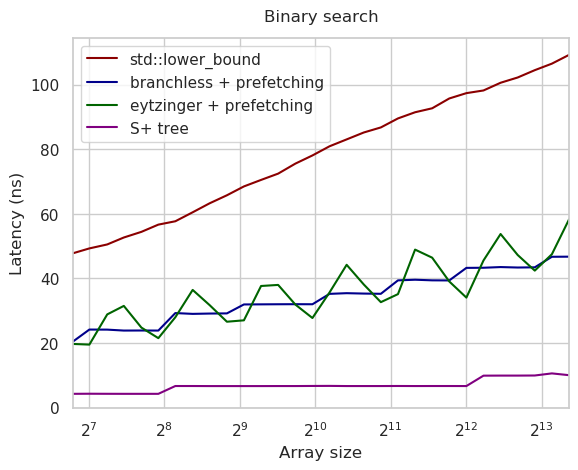

In [134]:
lim = 30
plt.plot(ns[:lim], results['std'][:lim], color='darkred', label='std::lower_bound')
plt.plot(ns[:lim], results['branchless-prefetch'][:lim], color='darkblue', label='branchless + prefetching')
plt.plot(ns[:lim], results['eytzinger-prefetch'][:lim], color='darkgreen', label='eytzinger + prefetching')
plt.plot(ns[:lim], results['bplus'][:lim], color='purple', label='S+ tree')
plot('Binary search', 'Latency (ns)', 'search-all-small.svg')

No handles with labels found to put in legend.


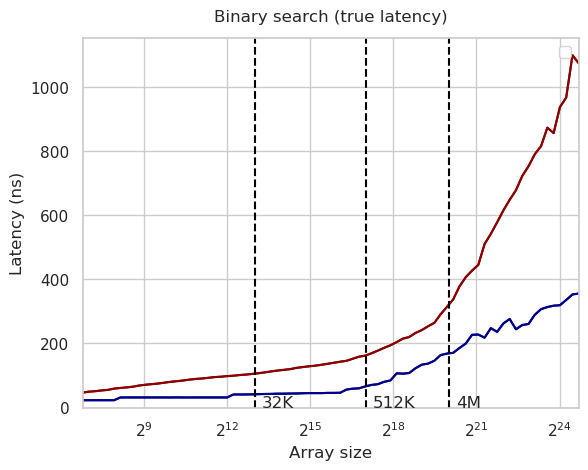

In [15]:
plt.plot(ns, latency_std, color='darkred')
plt.plot(ns, latency_bplus, color='darkblue')
plot('Binary search (true latency)', 'Latency (ns)', 'search-latency.svg', 1)

In [143]:
bench('std')

               std clang++ 1048576 1048576 1043364677 379.06


379.06

In [147]:
rand = [bench('random', n=n) for n in ns]

            random clang++ 111     1048576  401343905 180.5
            random clang++ 129     1048576  683151978 185.2
            random clang++ 152     1048576 1145900974 190.53
            random clang++ 177     1048576 1861841883 196.94
            random clang++ 208     1048576 1998708212 202.37
            random clang++ 243     1048576  184348407 206.79
            random clang++ 284     1048576 1998754916 211.7
            random clang++ 333     1048576 1301114552 216.47
            random clang++ 389     1048576 1586646185 221.28
            random clang++ 456     1048576 1252278531 227.99
            random clang++ 533     1048576  519225509 230.96
            random clang++ 624     1048576 1837231992 235.76
            random clang++ 730     1048576  700012869 241.1
            random clang++ 855     1048576  816943074 246.21
            random clang++ 1000    1048576  219491859 251.32
            random clang++ 1170    1048576  984634864 256.04
            random clang++ 1

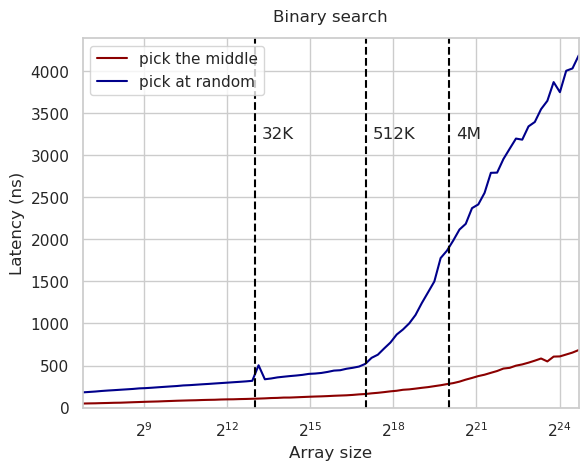

In [151]:
plt.plot(ns, results['std'], color='darkred', label='pick the middle')
plt.plot(ns, rand, color='darkblue', label='pick at random')
plot('Binary search', 'Latency (ns)', 'search-random.svg', 3200)

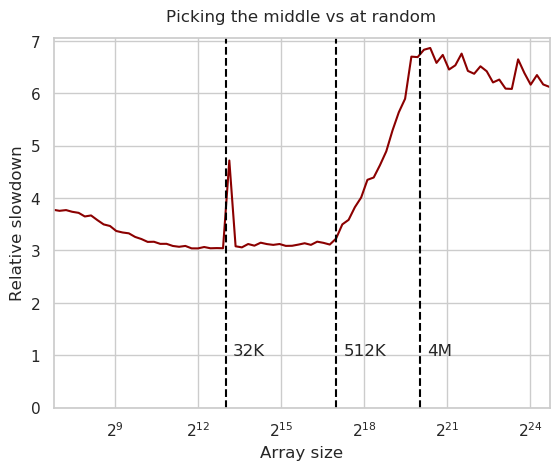

In [153]:
plt.plot(ns, [x / y for x, y in zip(rand, results['std'])], color='darkred')
plot('Picking the middle vs at random', 'Relative slowdown', 'search-random-relative.svg', 1, legend=False)

In [ ]:
sources1 = [
    'std',
    'branchless',
    'branchless-prefetch',
    'eytzinger',
    'eytzinger-prefetch',
    'eytzinger-prefetch2',
    'eytzinger-last',
    'btree',
    'btree-hugepages',
]

sources2 = [
    'btree-optimized',
    'bplus',
    'bplus32',
    'bplus-nontemporal'
]


In [ ]:
for i, current in enumerate(tasks):
    for (source, name, color), latencies in list(zip(tasks, results))[:i + 1]:
        plt.plot(ns, latencies, color=color, label=name)
    
    plot('Binary search', 'Latency (ns)', current[0] + '.svg', 1, legend=True)

In [64]:
bench('std')
bench('eytzinger', make=True)
bench('eytzinger-prefetch', make=True)

               std clang++ 1048576 1048576 1043364677 375.27
make: 'eytzinger' is up to date.
         eytzinger clang++ 1048576 1048576 1043364677 386.33
make: 'eytzinger-prefetch' is up to date.
eytzinger-prefetch clang++ 1048576 1048576 1043364677 368.16


368.16

In [59]:
for source, val in results.items():
    print(source, val)
    #plt.plot(ns[:lim], latencies[:lim], color=color, label=name)

#plot('Binary search', 'Latency (ns)', 'search-all.svg')

std [47.97, 49.68, 50.57, 53.4, 53.92, 56.36, 58.32, 59.86, 63.24, 65.56, 68.43, 70.74, 72.68, 75.41, 78.49, 80.44, 82.9, 85.43, 87.53, 89.51, 92.29, 93.9, 95.55, 97.5, 98.37, 100.48, 102.27, 104.59, 106.64, 109.94, 112.55, 114.7, 118.23, 119.63, 122.73, 125.16, 128.26, 130.59, 132.97, 135.76, 138.82, 142.7, 146.74, 148.84, 156.67, 161.77, 169.33, 174.59, 184.61, 193.62, 200.92, 207.42, 222.62, 227.13, 245.18, 249.09, 253.76, 264.98, 277.56, 300.43, 311.01, 351.11, 353.42, 371.64, 393.63, 422.91, 451.25, 464.05, 483.48, 504.67, 530.16, 536.32, 555.92, 570.31, 588.04, 620.38, 640.51, 674.26, 691.89, 697.13]
branchless [13.36, 17.01, 16.92, 16.57, 16.57, 16.54, 18.8, 18.79, 18.79, 18.92, 20.74, 20.81, 20.75, 20.92, 20.78, 23.11, 22.97, 23.11, 22.93, 25.56, 25.57, 25.57, 25.6, 28.32, 28.37, 28.41, 28.43, 28.65, 33.27, 34.22, 35.05, 35.72, 40.94, 41.89, 42.65, 43.35, 44.42, 49.78, 50.26, 51.1, 52.3, 57.03, 58.33, 59.22, 62.22, 67.63, 75.15, 78.63, 84.03, 90.66, 106.02, 110.24, 119.72, 128.

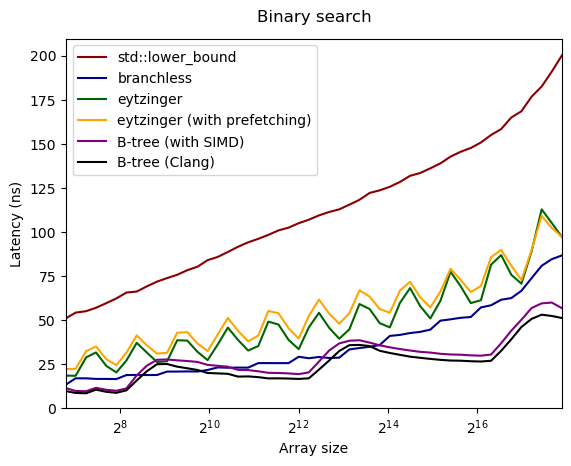

In [118]:
lim = 50
for (source, name, color), latencies in list(zip(tasks, results))[:-1]:
    plt.plot(ns[:lim], latencies[:lim], color=color, label=name)

plt.plot(ns[:lim], btree_clang[:lim], color='black', label='B-tree (Clang)')

plot('Binary search', 'Latency (ns)', 'mini.svg', legend=True)